In [2]:
# 1) What datetime range does your data cover?  How many rows are there total?

import csv
from datetime import datetime

# Open the CSV file and read the contents
import csv
import datetime

with open('trip_data_1.csv', 'r') as f:
    reader = csv.reader(f)

    # Get the date range and total number of rows
    dates = []
    row_count = 0
    for row in reader:
        if row_count == 0:
            # Find the index of the column that contains the dates
            date_col_index = row.index('pickup_datetime')

            # Skip the header row
            row_count += 1
            continue

        # Get the date from the specified column of the row
        date_str = row[date_col_index]
        date = datetime.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
        dates.append(date)
        row_count += 1

# Print the date range and total number of rows
print(f"Date range: {min(dates)} to {max(dates)}")
print(f"Total rows: {row_count}")

Date range: 2013-01-01 00:00:00 to 2013-01-31 23:59:59
Total rows: 14776616


In [3]:
# 2 a) What are the field names?  Give descriptions for each field.

import csv

f = open('trip_data_1.csv', 'r')
reader = csv.reader(f)
n = 0
for row in reader:
    print(row)
    
    n+=1
    if n ==1:
        break

['medallion', 'hack_license', 'vendor_id', 'rate_code', 'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'trip_time_in_secs', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']


In [ ]:
# 2 b)Give descriptions for each field.

import csv
from prettytable import PrettyTable

# Open CSV file and create CSV reader object
f = open('trip_data_1.csv', 'r')
reader = csv.reader(f)

# Get field names from the first row of the CSV file
field_names = next(reader)

# Field name descriptions
descriptions = {
    'medallion': 'An identifier for the taxi cab',
    'hack_license': 'An identifier for the taxi driver',
    'vendor_id': 'An identifier for the vendor that provided the record',
    'rate_code': 'The rate code for the trip, as defined in the vendor\'s operating region',
    'store_and_fwd_flag': 'Indicates whether the trip record was held in vehicle memory before sending',
    'pickup_datetime': 'The date and time when the passenger(s) were picked up',
    'dropoff_datetime': 'The date and time when the passenger(s) were dropped off',
    'passenger_count': 'The number of passengers in the vehicle',
    'trip_time_in_secs': 'The time in seconds between the pickup and dropoff',
    'trip_distance': 'The distance of the trip in miles (the unit of measure for distance may vary)',
    'pickup_longitude': 'The longitude coordinate where the passenger(s) were picked up',
    'pickup_latitude': 'The latitude coordinate where the passenger(s) were picked up',
    'dropoff_longitude': 'The longitude coordinate where the passenger(s) were dropped off',
    'dropoff_latitude': 'The latitude coordinate where the passenger(s) were dropped off'
}

# To create a PrettyTable object with the field names and descriptions
table = PrettyTable(['Field Name', 'Description'])
for field in field_names:
    table.add_row([field, descriptions.get(field, '')])

# Print the field names, descriptions and the table
print("Field Names and Descriptions:\n{}".format(table))
f.seek(0)  # Reset the file pointer to the beginning of the file

# Create a PrettyTable object with the field names and data
table = PrettyTable(field_names)
for row in reader:
    table.add_row(row)

# Print the table
print("\nData:\n{}".format(table))

Field Names and Descriptions:
+--------------------+-------------------------------------------------------------------------------+
|     Field Name     |                                  Description                                  |
+--------------------+-------------------------------------------------------------------------------+
|     medallion      |                         An identifier for the taxi cab                        |
|    hack_license    |                       An identifier for the taxi driver                       |
|     vendor_id      |             An identifier for the vendor that provided the record             |
|     rate_code      |    The rate code for the trip, as defined in the vendor's operating region    |
| store_and_fwd_flag |  Indicates whether the trip record was held in vehicle memory before sending  |
|  pickup_datetime   |             The date and time when the passenger(s) were picked up            |
|  dropoff_datetime  |            The date 

In [6]:
# 3) Give some sample data for each field.

import csv
from prettytable import PrettyTable

with open('trip_data_1.csv', 'r') as f:
    reader = csv.reader(f)
    fieldnames = next(reader)
    data = next(reader)

# create a PrettyTable instance and add columns
table = PrettyTable()
table.add_column("Field Name", fieldnames)
table.add_column("Sample Data", data)

# set the alignment and sort the table by field name
table.align["Field Name"] = "l"
table.sortby = "Field Name"

# print the table
print(table)



+--------------------+----------------------------------+
| Field Name         |           Sample Data            |
+--------------------+----------------------------------+
| dropoff_datetime   |       2013-01-01 15:18:10        |
| dropoff_latitude   |            40.751171             |
| dropoff_longitude  |            -73.989838            |
| hack_license       | BA96DE419E711691B9445D6A6307C170 |
| medallion          | 89D227B655E5C82AECF13C3F540D4CF4 |
| passenger_count    |                4                 |
| pickup_datetime    |       2013-01-01 15:11:48        |
| pickup_latitude    |            40.757977             |
| pickup_longitude   |            -73.978165            |
| rate_code          |                1                 |
| store_and_fwd_flag |                N                 |
| trip_distance      |               1.00               |
| trip_time_in_secs  |               382                |
| vendor_id          |               CMT                |
+-------------

In [3]:
# 4) What MySQL data types / len would you need to store each of the fields?
#int(xx), varchar(xx),date,datetime,bool, decimal(m,d)

#there is a suggested data type for each field based on the field names and sample data:

from prettytable import PrettyTable

# create a PrettyTable object
table = PrettyTable()

# add columns to the table
table.field_names = ["Column Name", "Data Type"]

# add rows to the table
table.add_row(["medallion", "VARCHAR(32)"])
table.add_row(["hack_license", "VARCHAR(32)"])
table.add_row(["vendor_id", "VARCHAR(3)"])
table.add_row(["rate_code", "SMALLINT"])
table.add_row(["store_and_fwd_flag", "BOOLEAN"])
table.add_row(["pickup_datetime", "DATETIME"])
table.add_row(["dropoff_datetime", "DATETIME"])
table.add_row(["passenger_count", "SMALLINT"])
table.add_row(["trip_time_in_secs", "INT"])
table.add_row(["trip_distance", "DECIMAL(4,2)"])
table.add_row(["pickup_longitude", "DECIMAL(9,6)"])
table.add_row(["pickup_latitude", "DECIMAL(8,6)"])
table.add_row(["dropoff_longitude", "DECIMAL(9,6)"])
table.add_row(["dropoff_latitude", "DECIMAL(8,6)"])

# print the table
print(table)




+--------------------+--------------+
|    Column Name     |  Data Type   |
+--------------------+--------------+
|     medallion      | VARCHAR(32)  |
|    hack_license    | VARCHAR(32)  |
|     vendor_id      |  VARCHAR(3)  |
|     rate_code      |   SMALLINT   |
| store_and_fwd_flag |   BOOLEAN    |
|  pickup_datetime   |   DATETIME   |
|  dropoff_datetime  |   DATETIME   |
|  passenger_count   |   SMALLINT   |
| trip_time_in_secs  |     INT      |
|   trip_distance    | DECIMAL(4,2) |
|  pickup_longitude  | DECIMAL(9,6) |
|  pickup_latitude   | DECIMAL(8,6) |
| dropoff_longitude  | DECIMAL(9,6) |
|  dropoff_latitude  | DECIMAL(8,6) |
+--------------------+--------------+


In [1]:
# 5) What is the geographic range of your data (min/max - X/Y)?
#Plot this (approximately on a map)

import dask.dataframe as dd

# Load the dataset into a Dask DataFrame
data = dd.read_csv('trip_data_1.csv')

# Define valid ranges for longitude and latitude
valid_longitude_range = (-180, 180)
valid_latitude_range = (-90, 90)

# Filter out invalid pickup and dropoff coordinates
pickup_mask = (data['pickup_longitude'] > valid_longitude_range[0]) & \
              (data['pickup_longitude'] < valid_longitude_range[1]) & \
              (data['pickup_latitude'] > valid_latitude_range[0]) & \
              (data['pickup_latitude'] < valid_latitude_range[1])
dropoff_mask = (data['dropoff_longitude'] > valid_longitude_range[0]) & \
               (data['dropoff_longitude'] < valid_longitude_range[1]) & \
               (data['dropoff_latitude'] > valid_latitude_range[0]) & \
               (data['dropoff_latitude'] < valid_latitude_range[1])
data = data[pickup_mask & dropoff_mask]

# Calculate the minimum and maximum values for longitude and latitude
min_pickup_longitude, max_pickup_longitude = data['pickup_longitude'].min().compute(), data['pickup_longitude'].max().compute()
min_pickup_latitude, max_pickup_latitude = data['pickup_latitude'].min().compute(), data['pickup_latitude'].max().compute()
min_dropoff_longitude, max_dropoff_longitude = data['dropoff_longitude'].min().compute(), data['dropoff_longitude'].max().compute()
min_dropoff_latitude, max_dropoff_latitude = data['dropoff_latitude'].min().compute(), data['dropoff_latitude'].max().compute()

# Calculate the overall geographic range of the data
min_longitude = min(min_pickup_longitude, min_dropoff_longitude)
max_longitude = max(max_pickup_longitude, max_dropoff_longitude)
min_latitude = min(min_pickup_latitude, min_dropoff_latitude)
max_latitude = max(max_pickup_latitude, max_dropoff_latitude)
geographic_range = ((min_longitude, min_latitude), (max_longitude, max_latitude))

# Print the geographic range of the data
print("Geographic range of the data (min longitude, min latitude) - (max longitude, max latitude):")
print(geographic_range)



Geographic range of the data (min longitude, min latitude) - (max longitude, max latitude):
((-179.36124, -39.762348), (112.40418, 83.516693))


The average trip distance is 19.48 km


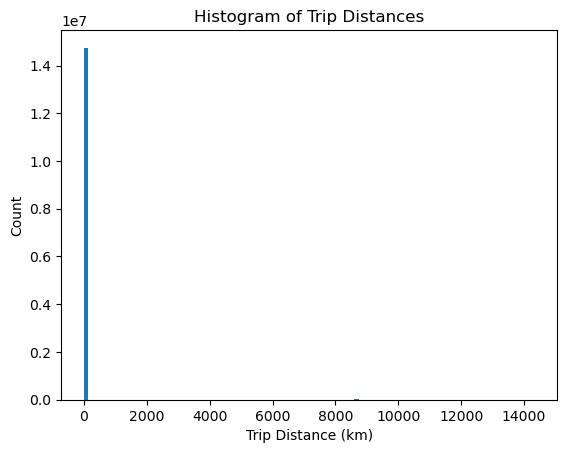

In [2]:
# 6) What is the average computed trip distance? (You should use Haversine Distance)
#Draw a histogram of the trip distances binned anyway you see fit.


import dask.dataframe as dd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a Dask DataFrame
data = dd.read_csv('trip_data_1.csv')

# Define valid ranges for longitude and latitude
valid_longitude_range = (-180, 180)
valid_latitude_range = (-90, 90)

# Filter out invalid pickup and dropoff coordinates
pickup_mask = (data['pickup_longitude'] > valid_longitude_range[0]) & \
              (data['pickup_longitude'] < valid_longitude_range[1]) & \
              (data['pickup_latitude'] > valid_latitude_range[0]) & \
              (data['pickup_latitude'] < valid_latitude_range[1])
dropoff_mask = (data['dropoff_longitude'] > valid_longitude_range[0]) & \
               (data['dropoff_longitude'] < valid_longitude_range[1]) & \
               (data['dropoff_latitude'] > valid_latitude_range[0]) & \
               (data['dropoff_latitude'] < valid_latitude_range[1])
data = data[pickup_mask & dropoff_mask]

# Define the Haversine distance formula
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2) ** 2 + \
        np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Compute the trip distance using the Haversine distance formula
data['trip_distance_km'] = haversine_distance(data['pickup_latitude'], data['pickup_longitude'],
                                              data['dropoff_latitude'], data['dropoff_longitude'])
avg_trip_distance = data['trip_distance_km'].mean().compute()

print(f"The average trip distance is {avg_trip_distance:.2f} km")

# Draw a histogram of the trip distances
plt.hist(data['trip_distance_km'].compute(), bins=100)
plt.xlabel('Trip Distance (km)')
plt.ylabel('Count')
plt.title('Histogram of Trip Distances')
plt.show()




In [1]:
# 7) What are the distinct values for each field

import csv
from prettytable import PrettyTable

# Open the file in read mode
with open('trip_data_1.csv', 'r') as f:
    reader = csv.reader(f)

    # Create a dictionary to hold distinct values for each column name
    distinct_values = {}
    
    # Read the header row to get the column names
    header = next(reader)
    
    # Initialize the dictionary with empty sets for each column name
    for column_name in header:
        distinct_values[column_name] = set()
    
    # Loop through each row in the file
    for row in reader:
        # Loop through each column in the row
        for i in range(len(header)):
            # Add the value to the corresponding set in the dictionary
            distinct_values[header[i]].add(row[i])
    
    # Create a prettytable object
    table = PrettyTable()
    
    # Add the columns to the table
    table.field_names = ["Field", "Sum of Distinct Values"]
    
    # Add the data rows to the table
    total_distinct_values = 0
    for column_name in header:
        num_distinct_values = len(distinct_values[column_name])
        total_distinct_values += num_distinct_values
        table.add_row([column_name, num_distinct_values])
    
    # Print the table
    print(table)
    
    # Print the total number of distinct values for all columns
    print("\nTotal number of distinct values: {}".format(total_distinct_values))


+--------------------+------------------------+
|       Field        | Sum of Distinct Values |
+--------------------+------------------------+
|     medallion      |         13426          |
|    hack_license    |         32224          |
|     vendor_id      |           2            |
|     rate_code      |           14           |
| store_and_fwd_flag |           3            |
|  pickup_datetime   |        2303465         |
|  dropoff_datetime  |        2305816         |
|  passenger_count   |           10           |
| trip_time_in_secs  |          6594          |
|   trip_distance    |          4368          |
|  pickup_longitude  |         40442          |
|  pickup_latitude   |         64511          |
| dropoff_longitude  |         56250          |
|  dropoff_latitude  |         88767          |
+--------------------+------------------------+

Total number of distinct values: 4915892


In [1]:
# 8) For other numeric types besides lat and lon, what are the min and max values?

import csv
from prettytable import PrettyTable

# Open the file in read mode
with open('trip_data_1.csv', 'r') as f:
    reader = csv.reader(f)

    # Read the header row to get the column names
    header = next(reader)
    
    # Create a dictionary to hold the min and max values for each numeric column
    numeric_values = {}
    
    # Initialize the dictionary with None for each numeric column
    for column_name in header:
        if column_name.endswith('_longitude') or column_name.endswith('_latitude'):
            continue  # Skip lat/lon columns
        numeric_values[column_name] = {'min': None, 'max': None}
    
    # Loop through each row in the file
    for row in reader:
        # Loop through each column in the row
        for i in range(len(header)):
            column_name = header[i]
            value = row[i]
            # Skip lat/lon columns
            if column_name.endswith('_longitude') or column_name.endswith('_latitude'):
                continue
            # Update the min and max values for numeric columns
            if value.isnumeric():
                value = int(value)
                if numeric_values[column_name]['min'] is None or value < numeric_values[column_name]['min']:
                    numeric_values[column_name]['min'] = value
                if numeric_values[column_name]['max'] is None or value > numeric_values[column_name]['max']:
                    numeric_values[column_name]['max'] = value
    
    # Create a PrettyTable to display the results
    table = PrettyTable()
    table.field_names = ["Column Name", "Minimum Value", "Maximum Value"]
    
    # Add each row to the table
    for column_name, values in numeric_values.items():
        if values['min'] is not None and values['max'] is not None:
            table.add_row([column_name, values['min'], values['max']])
    
    # Print the table
    print(table)


+-------------------+---------------+---------------+
|    Column Name    | Minimum Value | Maximum Value |
+-------------------+---------------+---------------+
|     rate_code     |       0       |      210      |
|  passenger_count  |       0       |      255      |
| trip_time_in_secs |       0       |     10800     |
+-------------------+---------------+---------------+


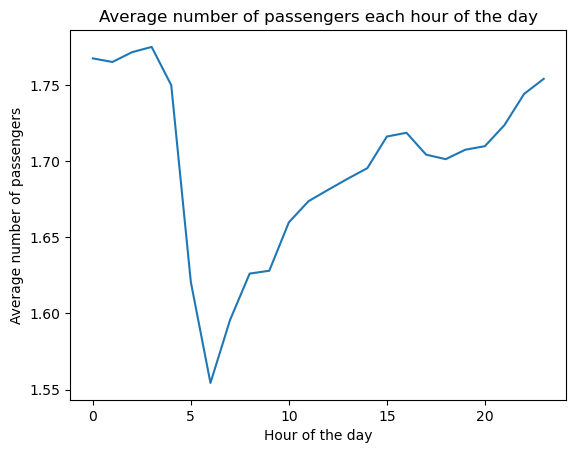

In [2]:
# 9) Create a chart which shows the average number of passengers each hour of the day.
#(X axis should have 24 hours)

import csv
from collections import defaultdict
import matplotlib.pyplot as plt

# Define a defaultdict to store the total number of passengers for each hour of the day
passenger_counts = defaultdict(int)

# Define a defaultdict to store the number of trips for each hour of the day
trip_counts = defaultdict(int)

# Read data from file
with open('trip_data_1.csv', 'r') as f:
    reader = csv.reader(f)

    # Loop through the data and update passenger_counts and trip_counts
    for row in reader:
        if row[7] != 'passenger_count':
            pickup_hour = int(row[5][11:13])
            passenger_counts[pickup_hour] += int(row[7])
            trip_counts[pickup_hour] += 1

# Calculate the average number of passengers for each hour of the day
averages = []
for hour in range(24):
    if trip_counts[hour] > 0:
        averages.append(passenger_counts[hour] / trip_counts[hour])
    else:
        averages.append(0)

# Plot the data
plt.plot(range(24), averages)
plt.xlabel('Hour of the day')
plt.ylabel('Average number of passengers')
plt.title('Average number of passengers each hour of the day')
plt.show()


In [3]:
#10) Create a new CSV file which has only one out of every thousand rows

import csv

with open('trip_data_1.csv', 'r') as input_file:
    with open('every1000row.csv', 'w', newline='') as output_file:
        reader = csv.reader(input_file)
        writer = csv.writer(output_file)

        # Write header row
        writer.writerow(next(reader))

        # Write every 1000th row to the output file
        for i, row in enumerate(reader):
            if i % 1000 == 0:
                writer.writerow(row)


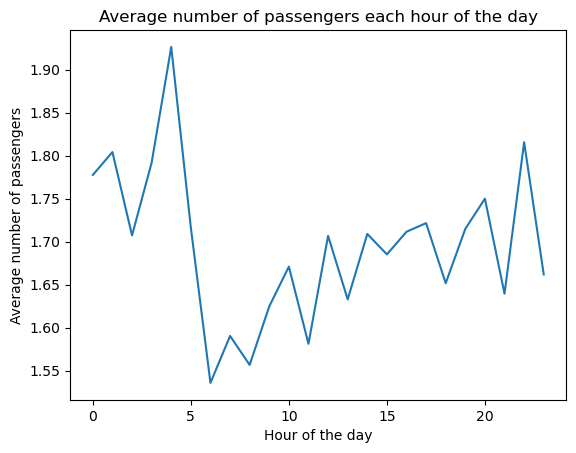

In [4]:
#11 Repeat step 9 with the reduced dataset and compare the two charts.

import csv
from collections import defaultdict
import matplotlib.pyplot as plt

# Define a defaultdict to store the total number of passengers for each hour of the day
passenger_counts = defaultdict(int)

# Define a defaultdict to store the number of trips for each hour of the day
trip_counts = defaultdict(int)

# Read data from file
with open('every1000row.csv', 'r') as f:
    reader = csv.reader(f)

    # Loop through the data and update passenger_counts and trip_counts
    for row in reader:
        if row[7] != 'passenger_count':
            pickup_hour = int(row[5][11:13])
            passenger_counts[pickup_hour] += int(row[7])
            trip_counts[pickup_hour] += 1

# Calculate the average number of passengers for each hour of the day
averages = []
for hour in range(24):
    if trip_counts[hour] > 0:
        averages.append(passenger_counts[hour] / trip_counts[hour])
    else:
        averages.append(0)

# Plot the data
plt.plot(range(24), averages)
plt.xlabel('Hour of the day')
plt.ylabel('Average number of passengers')
plt.title('Average number of passengers each hour of the day')
plt.show()
